<center>
<a href="http://www.insa-toulouse.fr/" ><img src="http://www.math.univ-toulouse.fr/~besse/Wikistat/Images/logo-insa.jpg" style="float:left; max-width: 120px; display: inline" alt="INSA"/></a> 

<a href="http://wikistat.fr/" ><img src="http://www.math.univ-toulouse.fr/~besse/Wikistat/Images/wikistat.jpg" style="float:right; max-width: 250px; display: inline"  alt="Wikistat"/></a>

</center>

# [Scénarios d'Exploration Statistique](https://github.com/wikistat/Exploration)

# Exploration et caractérisation de pourriels avec <a href="https://cran.r-project.org/"><img src="https://cran.r-project.org/Rlogo.svg" style="max-width: 40px; display: inline" alt="R"/></a>

#### Résumé 
Exploration statistique  d'un ensemble de données textuelles afin de définir les caractéristiques des pourriels (spam). Cette analyse nécessite la mise en oeuvre successive et donc l'apprentissage approfondi des principales méthodes de statistique mutidimensionnelle: [ACP](http://wikistat.fr/pdf/st-m-explo-acp.pdf), [AFC](http://wikistat.fr/pdf/st-m-explo-afcm.pdf), [MDS](http://wikistat.fr/pdf/st-m-explo-mds.pdf), [classification](http://wikistat.fr/pdf/st-m-explo-classif.pdf) non supervisée. Le scénario d'analyse proposé vise à la représentation la plus explicite des données étudiées et teste également une approché spécifique pour la fouille de texte et les matrices très creuses, la factorisation d'une matrice non-négative ([NMF](http://wikistat.fr/pdf/st-m-explo-nmf.pdf)).


## Introduction
### Objectif
Cette étude est un exemple d'*analyse textuelle* d'un corpus de documents, ici des courriels. Une telle analyse est classiquement basée sur la fréquence d'une sélection de mots. L'objectif est de mieux appréhender la structure particulière de ces données avant d'aborder un autre objectif de discrimination ou classification supervisée pour construire un *détecteur de pourriels* (*spams*)} personnalisé c'est-à-dire adapté au contenu spécifique de la boîte d'un internaute. Il s'agit en fait d'un modèle susceptible de prévoir la *qualité* d'un message reçu en fonction de son contenu. Le déroulement de cette étude est évidemment marqué par le type particulier des données mais celle-ci peut facilement se transposer à d'autres types de données textuelles  ou analyse du contenu: livres, pages web, discours politiques, réponses ouvertes dans des questionnaires... les exemples sont nombreux en sciences humaines, marketing lorsqu'il s'agit d'estimer des scores, par exemple, de satisfaction de clientèle. Les données se caractérisent généralement par des matrices très creuses c'est-à-dire comportant beaucoup de *0*s.

### Données
George, ingénieur chez HP dans le département *Computer Science* a recueilli un échantillon de messages électroniques dans chacun desquels il a évalué le nombre d'occurrences d'une sélection de mots et caractères. Les variables considérées sont, dans une première partie, des rapports: nombre d'occurrences d'un mot spécifique sur le nombre total de mots ou nombre d'occurrences d'un caractère sur le nombre de caractères du message avant d'être, dans une deuxième partie, des indicatrices ou facteurs: présence / absence de mots ou ensemble de caractères. Il a également considéré trois variables prenant en compte la casse (majuscule / minuscule) des caractères et une dernière qualitative binaire indiquant le classement qu'il a fait de chaque message : `spam` ou `Nsp`. Les variables d'occurrences sont décrites dans le tableau 1, celles associées à la casse dans le tableau 2. Ces données sont publiques, elles servent régulièrement de *benchmark* pour la comparaison de méthodes d'apprentissage machine:

Frank A., Asuncion A. (2010). [UCI Machine Learning Repository](http://archive.ics.uci.edu/ml). Irvine, CA: University of California, School of Information and Computer Science.

Ce sont donc finalement 58 variables qui sont observées sur 4601 messages dont 1813 pourriels (spams). La variable binaire `Spam` est présente à titre illustratif, elle est toujours considérée en supplémentaire dans ce travail exploratoire préliminaire. 


Le tableau ci-dessous liste 54 variables exprimant soit:
- le rapport du nombre d'occurrence d'un mot (resp. de caractères) sur le nombre total de mots (de caractères) dans un message,
- soit la présence ou non de ce mot (resp. caractère) dans le message, 
- des numéros (85...) qui sont ceux de bureau, téléphone, code postal de George.


*Tableau 1:  Les colonnes contiennent successivement le libellé de la variable, le mot ou ensemble de caractères concernés, le libellé des modalités Présence / Absence utilisées après recodage.*

Variable   | Mot ou Carac |    Modalités P/A   | Variable   | Mot ou Carac. |   Modalités  
  --|-- --|-- --|-- --|-- --|--               
make |    make |   make / Nmk|    X650 |   650 |   650 / N65 
address |   address |   addr / Nad |   lab |   lab |   lab / Nlb
all |   all |   all / Nal |   labs |   labs |   labs / Nls 
X3d |   3d |   3d / N3d |   telnet |   telnet |   teln / Ntl 
our |   our |   our / Nou |   X857 |   857 |   857 / N87 
over |   over |   over / Nov |   data |   data |   data / Nda  
remove |   remove |   remo / Nrm |   X415 |   415   | 415 / N41 
internet |   internet |   inte / Nin |   X85 |   85 |   85 / N85 
order |   order |   orde / Nor |   technology |   technology |   tech / Ntc 
mail |   mail |   mail / Nma |   X1999 |   1999 |   1999/ N19 
receive |   receive |   rece / Nrc |   parts |   parts |   part / Npr 
will |   will |   will / Nwi |   pm |   pm |   pm / Npm 
people |   people |   peop / Npp |   direct |   direct |   dire / Ndr 
report |   report |   repo / Nrp |   cs |   cs |   cs / Ncs 
addresses |   addresses   | adds / Nas |   meeting |   meeting |   meet/Nmt 
free |   free |   free / Nfr |   original |   original |   orig / or 
business |   business |   busi / Nbs |   project |   project |   proj / Npj 
email |   email |   emai / Nem |   re |   re |   re / Nre 
you |   you |   you / Nyo |   edu |   edu |   edu / Ned 
credit |   credit |   cred / Ncr |   table    | table |   tabl / Ntb 
your |   your |   your / Nyr |   conference |   conferenc |e   conf / Ncf 
font |   order |   font / Nft |   CsemiCol |   ; |   Cscl / NCs 
X000 |   000 |   000 / N00 |   Cpar |   (    | Cpar / NCp 
money |   money |   mone/ Nmn |   Ccroch |   [    | Ccro / NCc 
hp |   hp |   hp / Nhp |   Cexclam |    ! |   Cexc / NCe 
hpl |   hpl |   hpl / Nhl |   Cdollar |   \$ |   Cdol / NCd  
george |   george |   geor / Nge |   Cdiese | # |   Cdie / NCi  



Un deuxième tableau liste 4 variables dont celle dénombrant le nombre de lettres majuscules.


*Tableau 2:Liste de 4 variables, de leur libellé et des modalités après recodage.*

Code variable | Libellé | Modalités
--|-- --|--
Spam | Type de message pourriel ou non |  Spam / Nsp
CapLM |	Nombre moyen de capitales par mot |  Mm1 / Mm2 / Mm3
CapLsup	| Nombre max de capitales par mot | Ms1 / Ms2 / Ms3 
CapLtot	| Nombre totale de lettres capitales |	Mt1 / Mt2 / Mt3 


## Préparation des données 
### Lecture
Les données, déjà bien nettoyées et préparées à partir des messages bruts sont disponibles le fichier `spam.dat` chargé avec ce calepin dans le même répertoire .
 Les lire avec les commandes suivantes: 

In [1]:
spam=read.table("spam.dat",header=TRUE)
spam[,1]=as.factor(spam[,1])
summary(spam)

 spam          make           address            all              X3d          
 0:2788   Min.   :0.0000   Min.   : 0.000   Min.   :0.0000   Min.   : 0.00000  
 1:1813   1st Qu.:0.0000   1st Qu.: 0.000   1st Qu.:0.0000   1st Qu.: 0.00000  
          Median :0.0000   Median : 0.000   Median :0.0000   Median : 0.00000  
          Mean   :0.1046   Mean   : 0.213   Mean   :0.2807   Mean   : 0.06542  
          3rd Qu.:0.0000   3rd Qu.: 0.000   3rd Qu.:0.4200   3rd Qu.: 0.00000  
          Max.   :4.5400   Max.   :14.280   Max.   :5.1000   Max.   :42.81000  
      our               over            remove          internet      
 Min.   : 0.0000   Min.   :0.0000   Min.   :0.0000   Min.   : 0.0000  
 1st Qu.: 0.0000   1st Qu.:0.0000   1st Qu.:0.0000   1st Qu.: 0.0000  
 Median : 0.0000   Median :0.0000   Median :0.0000   Median : 0.0000  
 Mean   : 0.3122   Mean   :0.0959   Mean   :0.1142   Mean   : 0.1053  
 3rd Qu.: 0.3800   3rd Qu.:0.0000   3rd Qu.:0.0000   3rd Qu.: 0.0000  
 Max.   :10.00

In [2]:
dim(spam)

[1] 4601   58

### Description élémentaire
**Q** Commenter les distributions des variables (symmétrie, nombre de "0"). Quelle est la principale catractéristique de la matrice étudiée? 

Caractéristique très généralement rencontrée en *text mining*.

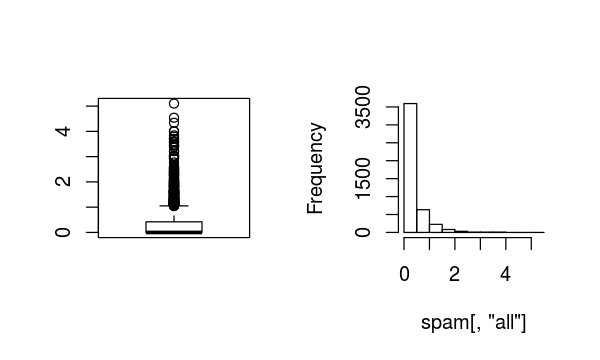

In [3]:
par(mfrow=c(1,2))
options(repr.plot.width=5, repr.plot.height=3)
boxplot(spam[,"all"]);hist(spam[,"all"],main="")

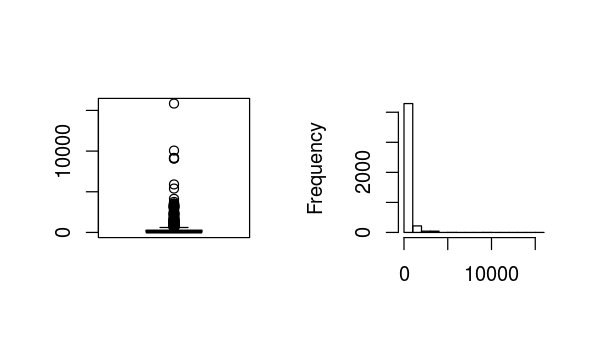

In [4]:
par(mfrow=c(1,2))
boxplot(spam[,"CapLtot"]);hist(spam[,"CapLtot"],main="",xlab="")

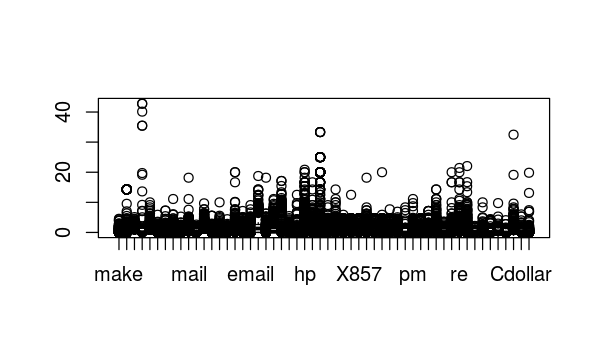

In [5]:
boxplot(spam[,2:55])

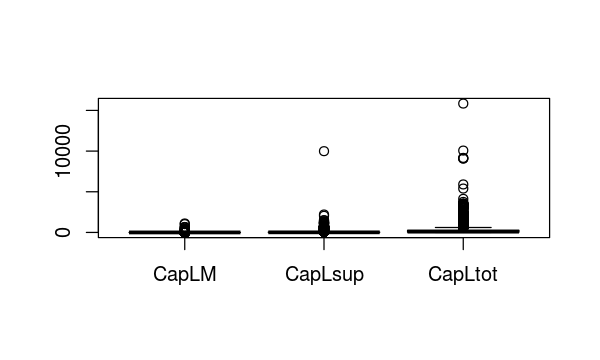

In [6]:
boxplot(spam[,56:58])

**Q** Commenter le choix de la transformation.

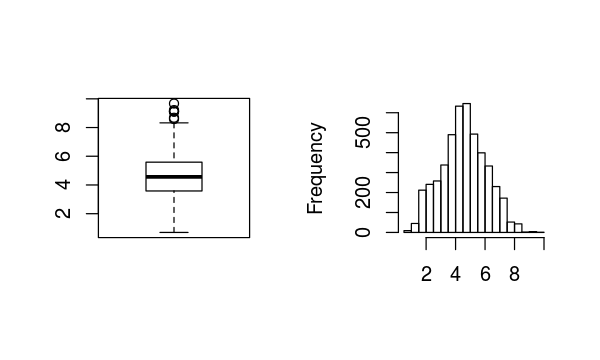

In [7]:
par(mfrow=c(1,2))
boxplot(log(1+spam[,"CapLtot"]));hist(log(1+spam[,"CapLtot"]),main="",xlab="")

In [8]:
Lspam=data.frame("spam"=spam[,1],log(1+spam[,2:58]))

## Approche "quantitative"
### [Analyse en composantes principales](http://wikistat.fr/pdf/st-m-explo-acp.pdf)
Ce sont d'abord les variables quantitatives (nombres d'occurences) qui sont étudiées pour tenter de caractériser les spams. Ces variables sont toutes transformées selon les remarques de la première partie. 

Une première ACP est calculée.

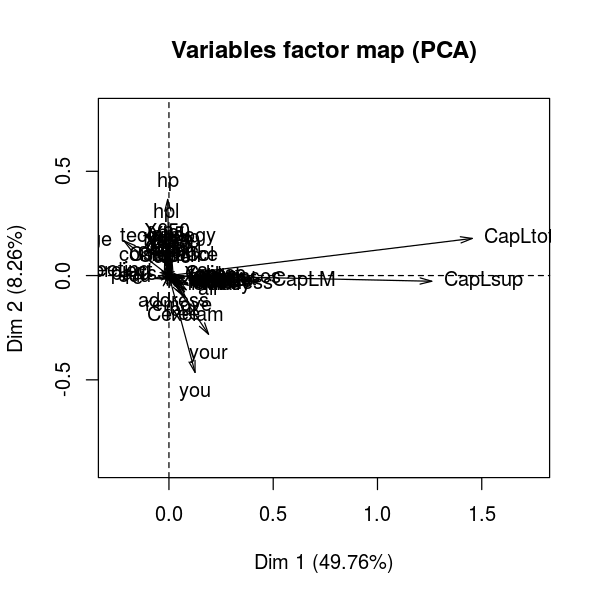

In [9]:
library(FactoMineR)
res.pca=PCA(Lspam,scale.unit = FALSE,quali.sup=1, graph=F)
options(repr.plot.width=5, repr.plot.height=5)
plot(res.pca,choix="var")

**Q** Que dire de cette représentation? Quel est le problème rencontré? Quelle est la matrice diagonalisée? Que serait-il préférable de faire?

En conséquence, une autre ACP est calculée fournissant un début de tableau ci-dessous. 

In [10]:
res.pca=PCA(Lspam,scale.unit = TRUE,quali.sup=1, graph=F)
summary(res.pca)


Call:
PCA(X = Lspam, scale.unit = TRUE, quali.sup = 1, graph = F) 


Eigenvalues
                       Dim.1   Dim.2   Dim.3   Dim.4   Dim.5   Dim.6   Dim.7
Variance               7.628   5.146   2.256   1.823   1.633   1.462   1.409
% of var.             13.383   9.028   3.957   3.199   2.865   2.566   2.473
Cumulative % of var.  13.383  22.411  26.368  29.567  32.432  34.998  37.471
                       Dim.8   Dim.9  Dim.10  Dim.11  Dim.12  Dim.13  Dim.14
Variance               1.365   1.328   1.235   1.205   1.170   1.081   1.063
% of var.              2.394   2.330   2.167   2.114   2.053   1.896   1.865
Cumulative % of var.  39.865  42.195  44.362  46.476  48.528  50.425  52.289
                      Dim.15  Dim.16  Dim.17  Dim.18  Dim.19  Dim.20  Dim.21
Variance               1.035   1.030   1.008   0.990   0.977   0.948   0.938
% of var.              1.816   1.807   1.769   1.738   1.714   1.663   1.646
Cumulative % of var.  54.105  55.913  57.682  59.419  61.133  62.796  6

**Q** Comment s'interprètent les *eignevalues*? Quel choix de dimension ou nombre de composantes retenues, donnerait la règle dite de Kaiser? Cette règle est-elle raisonnablement applicable?

**Q** Que sont les graphiques ci-dessous? Quel choix de dimension suggèrent-ils?

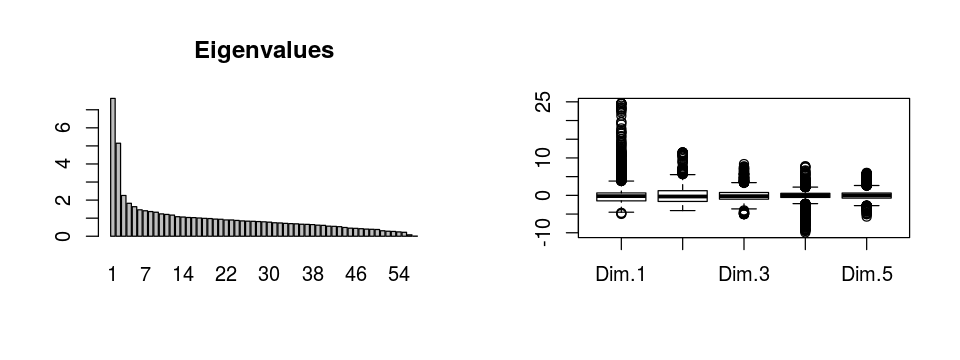

In [11]:
par(mfrow=c(1,2))
options(repr.plot.width=8, repr.plot.height=3)
barplot(res.pca$eig[,1],main="Eigenvalues",names.arg=1:nrow(res.pca$eig))
boxplot(res.pca$ind$coord)

**Q** Le graphique ci-dessous des variables est difficile à lire. Identifier néanmoins quelques variables permettant une première interprétation élémentaire des axes.

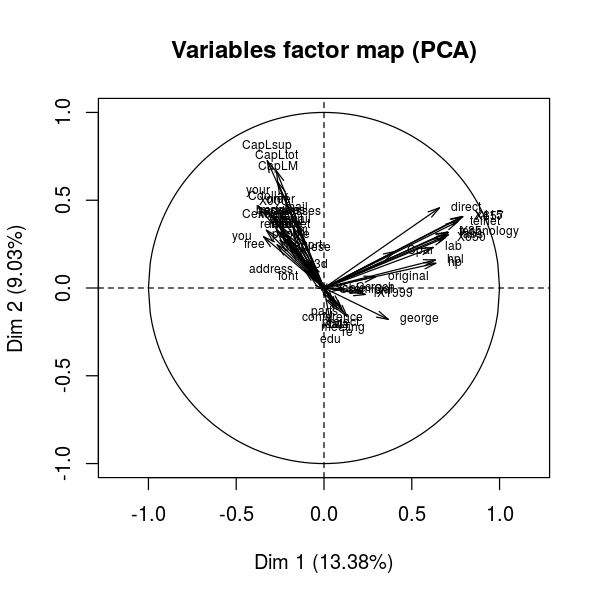

In [12]:
options(repr.plot.width=5, repr.plot.height=5)
plot(res.pca,choix="var",cex=0.6)

**Q** Le graphique suivant représente les "individus"; les points rouges identifient les pourriels. Caractérisez sommairement les deux types de messages. A la vue de ce graphique, pensez vous facile de discriminer linéairement les deux groupes?

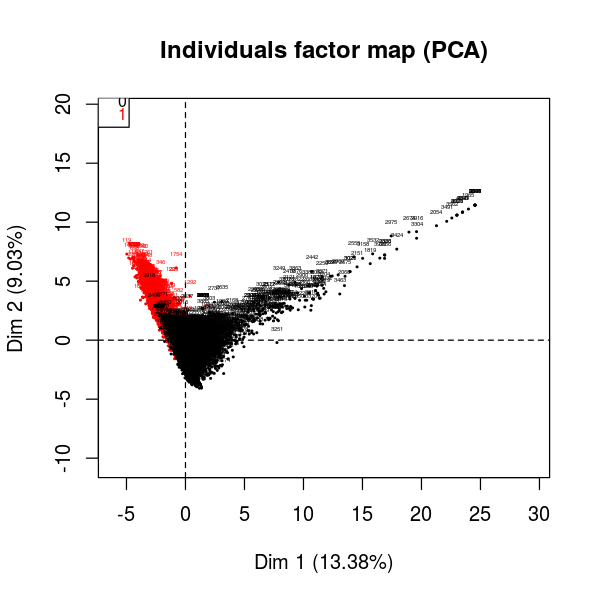

In [13]:
plot(res.pca,choix="ind",habillage=1,cex=0.3)

**Q** Complétrer l'interprétation des axes et la caractérisation des variables vis-à-vis du type de message.

In [14]:
res.pca=PCA(Lspam,scale.unit = FALSE, quali.sup=1, graph=F)

In [15]:
dimdesc(res.pca,axes=c(1,2))

,correlation,p.value
CapLtot,0.96045277,0.000000e+00
CapLsup,0.95669619,0.000000e+00
CapLM,0.72683749,0.000000e+00
order,0.41159006,1.229503e-187
your,0.36673091,1.823897e-146
Cdollar,0.36185551,2.275266e-142
X000,0.31381326,1.097187e-105
mail,0.29256054,1.758706e-91
all,0.27810132,1.730871e-82
business,0.27604822,2.965831e-81


### Classification des variables
Ces résultat ne sont pas satisfaisants, notamment à cause du nombre de variables. Une classification de celles-ci pourrait aider à l'interprétation.
#### [Classification ascendante hiérarchique](http://wikistat.fr/pdf/st-m-explo-classif.pdf)

**Q** Quelles est, ci-dessous, la distance calculée entre les "variables"? Est-elle euclidienne? Quelle autre distance aurait pu être utilisée?

In [16]:
dist.var<-as.dist(1-cor(Lspam[2:58])**2)

**Q** Quelle est la méthode utilisée ci-dessous et avec quelle option? Quelles autres options sont disponibles?

In [17]:
clas.var<-hclust(dist.var,method="ward.D")

**Q** Comment choisir le nombre de classes? Jusifier.

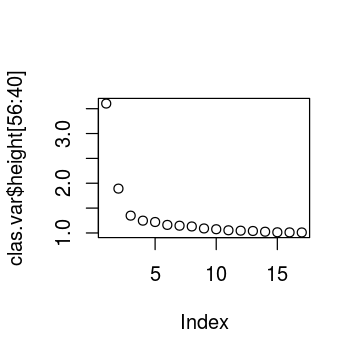

In [18]:
options(repr.plot.width=3, repr.plot.height=3)
plot(clas.var$height[56:40])

**Q** Comment sont mesurées les distances entre sous-groupes de variables ? Retrouvez dans le dendrogramme les deux classes de variables les plus explicites pour caractériser les messages.

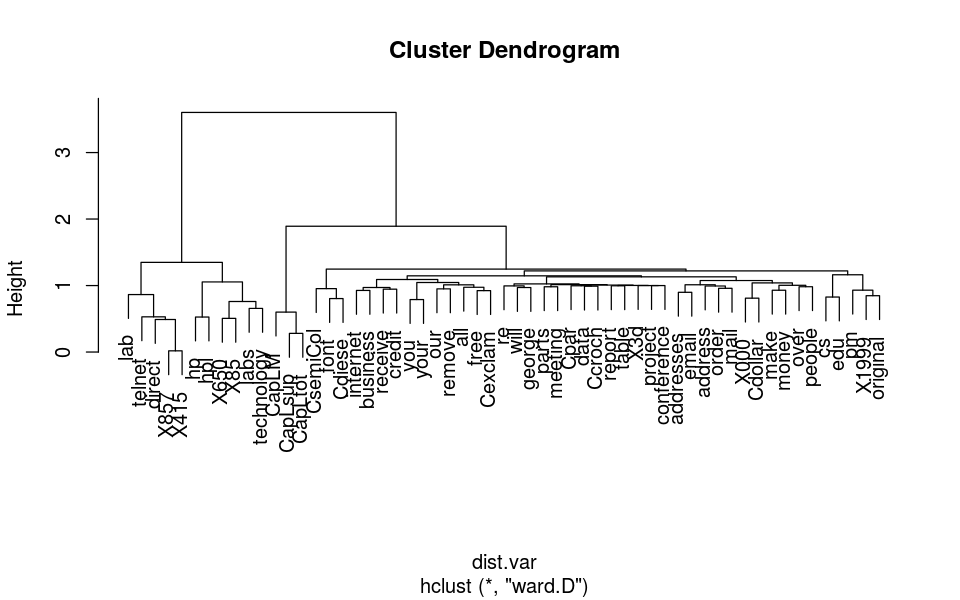

In [19]:
options(repr.plot.width=8, repr.plot.height=5)
plot(clas.var)

#### Repésentation par positionnement multidimensionnel ([MDS](http://wikistat.fr/pdf/st-m-explo-mds.pdf))

Représentation des classes dans le premier plan du MDS. 

**Q** La représentation obtenue ci-dessous est assez similaire à celle de l’ACP. Pourquoi selon-vous ?

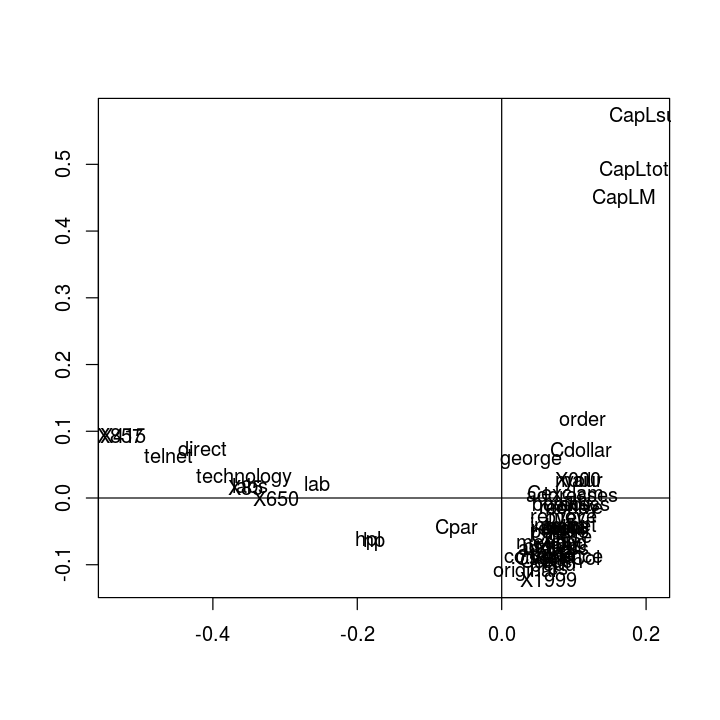

In [20]:
rS = cor(Lspam[2:58])
dS2=sqrt(1-rS**2)
dN=dimnames(Lspam[2:58])[[2]]
mdspam= cmdscale(dS2, k=2)
options(repr.plot.width=6, repr.plot.height=6)
plot(mdspam, type="n", xlab="", ylab="",main="")
text(mdspam,dN)
abline(v=0,h=0)

Représentation de 4 classes de variables dans les coordonnées du MDS

[1] "hp"         "hpl"        "X650"       "labs"       "X85"       
[6] "technology"

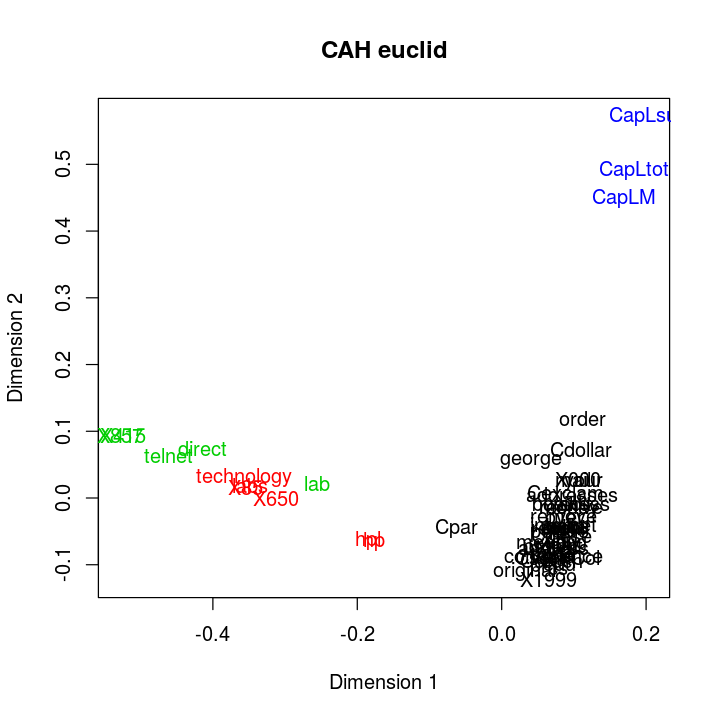

In [21]:
classes <- cutree(clas.var,k=4)
#sort(classes)
names(classes[classes==2]) #variables de la classe 2
coul = classes
plot(mdspam, type="n", xlab="Dimension 1",ylab="Dimension 2", main="CAH euclid")
text(mdspam,dN,col=coul)

**Q** Retrouve-t-on des éléments d'interprétation des variables dans l'ACP?

## Approche "qualitative" par Analyse des Correspondances Multiple ([AFCM](http://wikistat.fr/pdf/st-m-explo-afcm.pdf))
Les distributions des variables les rendent peu adaptées à une ACP. La matrice des données est en fait très creuse (beaucoup de 0). Une autre piste est suivie en considérant les variables qualitatives : présence / absence, d’un mot ou caractère. 
### Recodage
C'est souvent la partie la plus fastidieuse du travail: recoder en classe, c'est-à-dire transformer en facteur, chaque variable. Le point important est de donner à chaque modalité un identificateur suffisamment explicite pour que les sorties graphiques soient lisibles et ce d'autant plus qu'il y a de variables à traiter. 

Les commandes suivantes on été utilisées pour l'obtention du fichier `spamq.dat`. Elles sont données à titre d'exemple.

Recodage en présence / absence des variables ou mots.

`spamq=data.frame(matrix(as.factor(as.matrix(spam[,2:55]>0)),ncol=54))`

Les niveaux des facteurs sont renommés. Voici un exemple désignant la présente`make` et sont absence `Nmk` de la variable `make`.

`make=factor(spamq[,"make"], c(TRUE, FALSE),labels=c("make", "Nmk"))`
 
Les variales dénombrant les lesttres majuscules sont traitées à part avec la commande suivante. 

**Q** Quelles sont les bornes des classes, que peut-on dire des effectifs de chacune d’elles ?

``` 
CapLMq=cut(spam[,"CapLM"],breaks=quantile
      (spam[,"CapLM"], probs = seq(0, 1, 1/3)), 
      labels = c("Mm1","Mm2","Mm3"),
      include.lowest = TRUE)
```
Enfin, toutes variables sont regoupées dans la même base et sauvegardées. 

Il suffit de relire le fichier:

In [ ]:
spam.quali=read.table("spamq.dat")
summary(spam.quali)

### [Analyse Factorielle des Correspondances Multiple](http://wikistat.fr/pdf/st-m-explo-afcm.pdf)
Après le calcul de l'AFCM, une kyrielle de graphiques peuvent être construits. Certains sont proposés mais d'autres sont sans doute plus pertinents pour arriver à représenter au mieux la structure des données et expliquer les caractéristiques des spams.

**Q** L’analyse factorielle des correspondances multiple est exécutée dans FactoMineR avec la commande suivante. Que signifie l’option quali.sup ?

In [ ]:
afc=MCA(spam.quali,quali.sup=c(32,34,58))
summary(afc)

**Q** Que sont les *eigenvalues* du tableau précédents? Comment s'interprètent ces valeurs ?

**Q** Quelle AFC a été calculée ou quelle tableau a été décomposé (SVD) pour obtenir le graphe ci-dessous? Que dire de la représentation des individus de l’AFC par rapport à celle de l’ACP ?

In [ ]:
options(repr.plot.width=5, repr.plot.height=5)
plot(afc$ind$coord,type="p",pch=".",cex=2,col=as.integer(spam.quali[,58]))

**Q** Comment le graphique de droite ci-dessous a-t-il été obtenu à partir de celui de gauche? En quoi celui-ci aide-t-il à caractériser un peu mieux les pourriels des autres messages ?

In [ ]:
par(mfrow=c(1,2))
options(repr.plot.width=10, repr.plot.height=5)
plot.MCA(afc,invisible=c("ind"),col.var="blue",cex=0.6)
plot.MCA(afc,invisible=c("ind"),col.var="blue",xlim=c(-1,1),ylim=c(-1,1),cex=0.6)

La dispersion des message est plus encourageante qu'avec l'ACP mais que dire d'une possible discrimination linéaire entre pourriels et courriels?

### Classification des modalités
Comme les modalités sont très nombreuses, une classification de celles-ci va aider à l'interprétation.
#### Par CAH puis [*k-means*](http://wikistat.fr/pdf/st-m-explo-classif.pdf)
**Q** Quelle est la matrice qui est construite ci-dessous ? A partir de quelles "composantes"?

In [ ]:
dist.mod=dist(afc$var$coord, method="euclidean")

**Q** La fonction R produit le graphe ci-dessous. Justifier le nombre de classes à retenir (4).

In [ ]:
hclusmod=hclust(dist.mod,method="ward.D")
options(repr.plot.width=4, repr.plot.height=4)
plot(hclusmod$height[112:100])

In [ ]:
options(repr.plot.width=12, repr.plot.height=4)
plot(hclusmod)

In [ ]:
hclasmod = cutree(hclusmod,k=4)
clas.mod=kmeans(afc$var$coord, 4)
kclasmod=clas.mod$cluster
# comparaison des classes entre CAH et k-means
table(hclasmod,kclasmod)

**Q** Quel autre algorithme est utilisé ci-dessus? Que fournit-il comme résultat ? Que dire des deux classifications obtenues et donc de leur "robustesse"? 
#### Représentation des classes dans l'[AFCM](http://wikistat.fr/pdf/st-m-explo-afcm.pdf)

**Q** Comment le graphe ci-dessous a-t-il été obtenu?

In [ ]:
options(repr.plot.width=6, repr.plot.height=6)
plot.MCA(afc,invisible=c("ind"),col.var=as.integer(clas.mod$cluster),cex=0.6)

Lister les modalités des variables par classe. 

In [ ]:
names(hclasmod)[hclasmod==1]
names(hclasmod)[hclasmod==2]
names(hclasmod)[hclasmod==3]
names(hclasmod)[hclasmod==4]

**Q** Quelles co-occurrences de quels mots/caractères caractérisent principalement les spams? 

**Q** Quels sont les messages indifférentiables? Que suggérer à Georges pour améliorer son détecteur de pourriel? 

## Approche par [Factorisation non négative](http://wikistat.fr/pdf/st-m-explo-nmf.pdf)
Les données quantitatives sont reconsidérées mais en intégrant le caractère essentiellement non négatif de la matrice des données ainsi que sa parcinomie (matrice très creuse). Cette situation couramment répandue a suscité une nouvelle forme d'analyse dite Non Negativ Matrix Factorization ([NMF](http://wikistat.fr/pdf/st-m-explo-nmf.pdf)) dont le principe est de rechercher deux matrices de faible rang *r* de telle sorte que leur produit approche au mieux les valeurs observées. Cette méthode très utilisée pour la recommandation de produits par filtrage collaboratif est illustré sur ces données.

**Q** Quelles différences majeurs entre une NMF et une SVD?

Les matrices de faible rang ou les facteurs ne permettent plus de représentation comme en ACP mais au moins une classification non supervisée des objets lignes et colonnes de la matrice décomposée.

Cette approche est testée sur les données de spam pour en comparer les résultats obtenus. 

### `NMF` de R
La librairie `NMF` ([Gaujoux et Seoighe, 2010](https://bmcbioinformatics.biomedcentral.com/articles/10.1186/1471-2105-11-367)) de R propose plusieurs versions de l'algorithme de factorisation dont principalement *Multiplicative update algorithms* et *Alternate least Square* (ALS), adaptées à deux fonctions perte possibles: divergence de Kullback-Leibler (KL) ou moindres carrés. 

**Attention**, les choix: fonction objectif, algorithme, rang des matrices, influencent fortement les résultats obtenus qui se résument principalement à des classifications construites sur les facteurs de la décomposition. 

In [ ]:
library(NMF)
nmfAlgorithm()

**Q** Identifier les algorithmes disponibles ainsi que la fonction objectif associée. . Plusieurs initialisation sont possibles; seule celle aléatoire est utilisée.

In [ ]:
nmfAlgorithm("brunet")

In [ ]:
nmfAlgorithm("lee")

In [ ]:
nmfAlgorithm("snmf/l")

In [ ]:
nmfAlgorithm("snmf/r")

Les données quantitatives initiales (comptages "non négatifs") sont reprises en compte. 

**Attention**, les données sont bien creuses et non négatives, mais les variables s'expriment dans des unités et donc avec des variances très différentes. Une forme de normalisation est nécessaire. 

In [ ]:
summary(spam)

Les données doivent être sous la forme d'une matyrice non négative:

In [ ]:
creux=as.matrix(spam[,2:58])
classe=spam[,1]

**Q** Justifiez la transformaiton suivante:

In [ ]:
creux=cbind(log(1+creux[,1:54]),log(creux[,55:57])/2)
boxplot(creux)

Souci: quelques lignes (messages) se trouvent avec uniquement des 0; Celles-ci sont supprimées. 

In [ ]:
sum(apply(creux,1,sum)==0)
# 3 messages sont devenus tout à 0
# suppression
ident=apply(creux,1,sum)!=0
creux=creux[ident,]
classe=classe[ident]

Recherche d'une "meilleure" méthode en exécutant, pour chacune d'entre elles, 10 factorisations de rang 5. Les exécutions sont répétées car la convergence locale dépend de l'initialisation aléatoire.

In [ ]:
res.multi.method=nmf(creux, 5,nrun=10,list("brunet","lee","snmf/l","snmf/r"),seed = 111, .options ="t")
compare(res.multi.method)

**Q** Les comparaisons sont reproduites dans le graphe ci-dessous. Expliquer comment est obtenu ce graphe. Quelle méthode retenir.

In [ ]:
consensusmap(res.multi.method,hclustfun="ward") 

De façon analogue, plusieurs 10 décompositons sont calculées pour défférentes valeurs de rang.

In [ ]:
estim.r=nmf(creux,2:7,method="snmf/l",nrun=10,seed=111)
plot(estim.r)  

In [ ]:
consensusmap(estim.r) 

**Q** Utiliser les résultats précédents pour justifier le choix d'un rang "optimal". 

Une fois méthode et rang déterminés, itérer plusieurs fois l'exécution (30) pour en déterminer une "meilleure". 

In [ ]:
nmf.spam=nmf(creux,5,method="snmf/l",nrun=30,seed=111)

Remarquer la complexité de la procédure mise en oeuvre et le temps de calcul nettemnte supérieurs à la recherche d'une simple décomposition en valeurs singulières. (SVD)

Extraction des résulats numériques.

In [ ]:
summary(nmf.spam)

Extraction des matrices de la décompositon.

In [ ]:
w=basis(nmf.spam)
h=coef(nmf.spam)

Production des graphiques associés aux matrices `w` et `h` de la factorisation. La classe des messages (spam ou pas spam) est ajoutée dans la représentation des lignes: couleur de la première colonne de légende X2 (0 ou 1). La deuxième colone (basis) indique le numéro du facteur qui représente le mieux le message ou le mot.

In [ ]:
basismap(nmf.spam,annRow=classe,hclustfun="ward")

In [ ]:
coefmap(nmf.spam,hclustfun="ward")

Remarquer la plus ou moins bonne séparation des pourriels et courriels dans les classes de la CAH ainsi que les regropements de mots / variables.

Il est possible de calculer des distances entre lignes (messages) d'une part et entre colonnes (mots) d'autres part à partir de chacune des matrices `w` et `h` puis de faire des représentations de chacun de ces ensembles par un positionnement multidiemnsionnel (MDS) comme dans la section ACP. Mais, il n'est pas possible, comme en comme en ACP ou AFCM de mettre en relation les deux représentations des lignes et colonnes, individus et variables de la matrice factorisée. 

Cela peut être fait de façon détournée à l'aide d'une *heatmap* qui représente la matrice des données initiales en permutant lignes et colonnes comme conséquence des classifications hiérarchiques. La librairie `NMF` (Gaujoux et Seoighe, 2010) a été réalisée et publiée avec pour premier objectif le traitement des données génomiques dans l'environnement de Bioconductor, donc de la Bioinformatique. C'est sans doute ce qui explique l'utilisation systématique de la classification ascendante hiérarchique et des représentations graphiques par *heatmap*.

In [ ]:
dist.mod=dist(scale(w), method="euclidean")
hclusmod.w=hclust(dist.mod,method="ward")
dist.mod=dist(t(h), method="euclidean")
hclusmod.h=hclust(dist.mod,method="ward")
plot(hclusmod.h)

aheatmap(creux,Rowv=hclusmod.w,Colv=hclusmod.h,annRow=classe)

Repérer où se concentrent les pourriels en relation avec le plus d'occurences de certains mots ou caractères.

**Q** Quelle stratégie: ACP, AFCM ou NMF vous permet de mieux analyser les caractéristiques des pourriels?